# Task: Data Exploration and Preprocessing

Explore the dataset and identify the number
of rows and columns.

Check for missing values in each column and
handle them accordingly.

Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

# Step1: 
Load and Explore the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import pandas
import pandas as pd

# Load the dataset (make sure the path is correct)
df = pd.read_csv(r"C:\Users\HP\Downloads\Dataset .csv")

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Show the first 5 rows
df.head()


Shape of the dataset: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Explanation:

pd.read_csv() loads your data.

.shape tells you the number of rows and columns.

.head() shows the first 5 rows to understand the structure.

# Step 2: 
Check for Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Optionally, check the percentage
print("Missing values percentage:\n", (missing_values / len(df)) * 100)


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values percentage:
 Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency          

Explanation:

isnull().sum() shows total nulls per column.

This helps decide whether to drop or fill missing values.

# Step 3: 
Handle Missing Values

In [5]:
# Fill missing values for numerical columns with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Optional: Check again if any missing values remain
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


Explanation:
    
Numerical: fill missing with mean.

Categorical: fill missing with the most frequent value (mode).

# Step 4: 
Data Type Conversion

In [6]:
# Check data types
print(df.dtypes)

# Example: Convert "Aggregate rating" to float if not already
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


Explanation:
    
Sometimes values are loaded as strings even if they look numeric.

pd.to_numeric(..., errors='coerce') converts them and handles errors.

# Step 5: 
Analyze Distribution of Target Variable

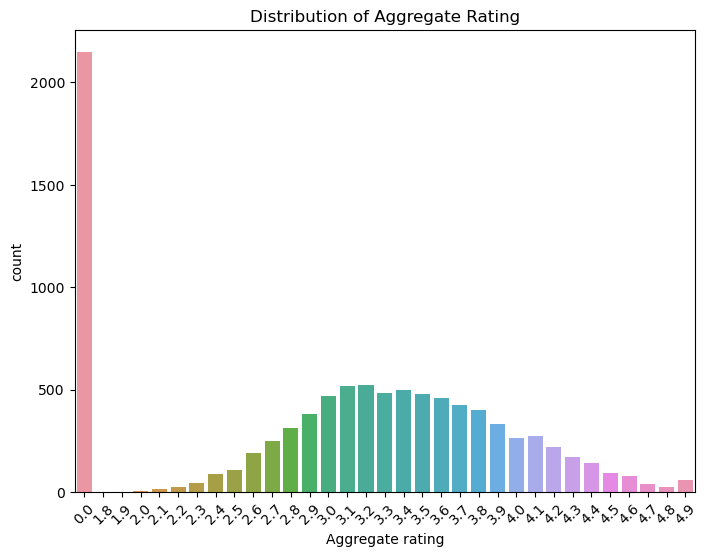

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Aggregate rating', data=df)
plt.title('Distribution of Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

# Check value counts
print(df['Aggregate rating'].value_counts())


Explanation:
    
countplot() gives a bar chart of how many entries per rating.

You can visually detect class imbalance.

.value_counts() shows exact numbers.

# Step 6: 
Check for Class Imbalance

A quick rule:

If one class dominates the others (e.g., 80% of rows), you have imbalance.

You can also calculate it:

In [12]:
rating_counts = df['Aggregate rating'].value_counts(normalize=True)
print("Class distribution (in %):\n", rating_counts * 100)


Class distribution (in %):
 0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: Aggregate rating, dtype: float64


✅ Summary of Tasks Covered:

✔️ Loaded data, checked shape.

✔️ Checked and handled missing values.

✔️ Converted data types if needed.

✔️ Analyzed target variable distribution.

✔️ Identified any class imbalance.